# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Justine|secret |
|Mylène|secret |
|Mohammed|secret |
|Wouter|secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

# RDF(S) and SPARQL for Dummies


![1](https://i.imgur.com/0KSJDEB.png)

![2](https://i.imgur.com/5HDwIbB.png)

In [2]:
import networkx as nx
import rdflib
from rdflib.namespace import OWL, RDF, RDFS
from rdflib import Graph, BNode, Literal, Namespace

## Networkx -> RDF FUNCTIE
Networkx is erg sterk in grote verbonden grafen maken. RDFlib is hier minder uitgebreid in. Daarom is het een goede methode om eerst networkx te gebruiken voor het ontwerp van je graaf, en vervolgens deze om te zetten naar het RDFlib format. In de volgende cel is zo'n omzet functie geschreven. In de comments leggen we uit hoe het allemaal in elkaar steekt.

In [3]:
def networkx2RDF(G):
    
    # Maak RDF graph
    H = Graph()
    
    # Maak een namespace voor de nodes en relaties
    nsp = Namespace('http://example.org/')

    # Zet networkx om naar RDFlib graph: Nodes
    for n in G:
        
        # Voor alle properties die nodes van G hebben
        for i in range(len(list(G.nodes[n].keys()))):
            
            # Subject is de naam van de node met " " -> "_" voor de namespace URL
            sub = n.replace(" ", "_")
            
            # Predicate is de naam van de attribuut van de node
            pred = list(G.nodes[n].keys())[i].replace(" ", "_")
            
            # Object is de waarde van de attribuut van de node
            obj = G.nodes[n][list(G.nodes[n].keys())[i]].replace(" ", "_")
            
            # Voeg de triple toe aan de RDF graph
            if (nsp[sub], nsp[pred], rdflib.Literal(obj)) not in H:
                H.add((
 
                    # Voeg triple toe
                    nsp[sub], nsp[pred], rdflib.Literal(obj)
                ))

    # Zet networkx om naar RDFlib graph: Relaties
    for edge in G.edges(data=True):
        
        # Subject is de naam van de node met " " -> "_" voor de namespace URL
        sub = edge[0].replace(" ", "_")
        
         # Predicate is de de attribuut van de edge
        pred = list(G[edge[0]][edge[1]].values())[0].replace(" ", "_")
        
        # Object is de naam van de node met " " -> "_" voor de namespace URL
        obj = edge[1].replace(" ", "_")
        
        # Voeg triple toe
        H.add(( nsp[sub], nsp[pred], nsp[obj]))

    return H

## Familie graph
Met predicaatlogica in RDF kan je ook families definiëren. Laten we deze familie eerst in networkx ontwerpen en vervolgens overzetten naar RDF. Hiermee wordt het je waarschijnlijk ook duidelijker wat de bovenstaande functie doet in de praktijk.

In [4]:
G = nx.DiGraph()

# Definieer relaties R(x,y): x is ouder van y
Relaties = [('Piet', 'Lucas'), ('Christine', 'Lucas'), ('Piet', 'Julie'), ('Christine', 'Julie'),
            ('Lucas', 'Justine'), ('Catherine', 'Justine'), ('Lucas', 'Tjalling'), ('Catherine', 'Tjalling'),
            ('Hector', 'Catherine'), ('Hector', 'Matthew'), ('Erika', 'Catherine'), ('Erika', 'Matthew'),
            ('Matthew', 'Julius'), ('Matthew', 'Annabelle'), ('Matthew', 'David-Jan'), ('Jitske', 'Julius'),
            ('Jitske','Annabelle'), ('Jitske','David-Jan'), ('Hector', 'Julietta'), ('Erika', 'Julietta'),
            ('Julietta', 'Rutger Jr'), ('Rutger', 'Rutger Jr')]

G.add_edges_from(Relaties, rel='is_ouder_van')

# Definieer geslacht
Mannen,Vrouwen= {'Piet', 'Lucas','Tjalling', 'Matthew', 'Hector', 'Julius', 'David-Jan', 'Rutger',
                 'Rutger Jr'}, {'Christine','Catherine','Justine', 'Jitske', 'Annabelle',
                 'Erika', 'Julietta', 'Julie'} 

# Zet geslacht om naar property: geslacht, in networkx
for n in Mannen:
    G.nodes[n]['geslacht'] = 'Man'
for n in Vrouwen:
    G.nodes[n]['geslacht'] = 'Vrouw'


g = networkx2RDF(G)

## Familie queries
Nu we de networkx grafen in RDF hebben omgezet kunnen we met SPARQL queries informatie/verbanden uit de graaf opvragen. Hierin maken we eerst duidelijk welke prefix de graaf heeft, en dan kunnen we informatie selecteren die aan een hoeveelheid voorwaarden voldoet. Zo kunnen we de vaders opvragen omdat dat iedere man is die ouder is van iemand anders. Het is eigenlijk dezelfde logica als predicaatlogica.

In [5]:
# FAMILIERELATIES

ouder = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o 
    WHERE { ?o :is_ouder_van ?p .} """)


vader = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o 
    WHERE 
    { 
        ?o :is_ouder_van ?p .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Man").
    }""")

moeder = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o 
    WHERE 
    { 
        ?o :is_ouder_van ?p .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Vrouw")
    }""")



opa = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :is_ouder_van ?p .
        ?p :is_ouder_van ?k .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Man")
    }""")

oma = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :is_ouder_van ?p .
        ?p :is_ouder_van ?k .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Vrouw")
    }""")

dochter = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?p :is_ouder_van ?o .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Vrouw")
    }""")

zoon = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o 
    WHERE 
    { 
        ?p :is_ouder_van ?o .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Man")
    }""")

broer = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?k :is_ouder_van ?o .
        ?k :is_ouder_van ?p .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Man" && ?o != ?p).
    }""")

neef = g.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?k :is_ouder_van ?p .
        ?k :is_ouder_van ?l .
        ?l :is_ouder_van ?o .
        ?o :geslacht ?geslacht .
        FILTER(?geslacht = "Man" && ?l != ?p).
    }""")


#functies voor predicaatlogica
def M(x, network=G):
    return network.nodes[x]['geslacht'] == 'Man'
def V(x, network=G):
    return network.nodes[x]['geslacht'] == 'Vrouw'
def R(x,y,network=G):
    return network.has_edge(x,y)

# Predicaatlogica om te checken of het klopt
Ouder = {(x,y) for x in G for y in G if R(x,y,G)}

Vader= {(x,y) for x in G for y in G if R(x,y,G) and M(x,G)}

Moeder = {(x,y) for x in G for y in G if R(x,y,G) and V(x, G)}

Dochter = {(x,y) for x in G for y in G if R(y,x,G) and V(x,G)}

Zoon = {(x,y) for x in G for y in G if R(y,x,G) and M(x,G)}

Kind = {(x,y) for x in G for y in G if R(y,x,G)}

Sibling = {(x[0],y[0]) for x in Kind for y in Kind if x[1] == y[1] and x[0] != y[0]}

Broer = { (x,y) for x,y in Sibling if M(x,G)}

Opa = {(x[0],y[0]) for x in Ouder for y in Ouder if R(x[0],y[0],G) and M(x[0],G)}

Oma = {(x[0],y[0]) for x in Ouder for y in Ouder if R(x[0],y[0],G) and V(x[0],G)}

Neef = {(x[0]) for x in Zoon for y in Sibling if x[1]==y[0]}
 
# Zijn ze hetzelfde?
print(Neef)
list(neef)

{'Rutger Jr', 'David-Jan', 'Tjalling', 'Julius'}


[(rdflib.term.URIRef('http://example.org/Tjalling')),
 (rdflib.term.URIRef('http://example.org/David-Jan')),
 (rdflib.term.URIRef('http://example.org/Julius')),
 (rdflib.term.URIRef('http://example.org/Rutger_Jr'))]

## LHBTI++ graph
Je kan met predicaatlogica ook andere relaties definiëren. Bijvoorbeeld de LHBTQAI gemeenschap waarbij elke letter staat voor een bepaalde sexuele voorkeur of geslacht. Deze gemeenschap is hieronder in een networkx graph weergegeven en daarna omgezet in een RDF graph.
MGV staat bijvoorbeeld voor een man-geboren-vrouw, oftewel iemand die zich op dit moment voelt als vrouw, maar geboren is als man. De individuen in dit netwerk hebben de naam van hun geslacht/voorkeur zodat ze later bij de queries makkelijk te controleren zijn en waardoor het bij het maken van het netwerk duidelijk wordt wat een bepaalde letter in LHBTQAI voorstelt.

In [6]:
G = nx.DiGraph()

# Definieer relaties (R(x,y): x voelt zich aangetrokken tot y)
relaties = [('MGMhomo', 'VGMhomo'), ('VGMhomo', 'MGMhomo'), ('MGMbisexueel', 'VGVhetero'), ('MGMbisexueel', 'VGMhetero'),
               ('VGVhetero', 'MGMbisexueel'), ('VGVlesbienne', 'MGVbisexueel'), ('MGVhetero', 'MGMasexueel'),
               ('MGVbisexueel', 'VGVlesbienne'), ('MGVbisexueel', 'VGMhomo'), ('VGMhetero', 'VGVhetero'), 
               ('MGVbisexueel', 'Iasexueel'), ('Iquestioning', 'VGMhomo'), ('Iquestioning', 'MGVhetero')]

# Definieer groepen op basis van geslacht
man_geboren_mannen, vrouw_geboren_vrouwen, man_geboren_vrouwen, vrouw_geboren_mannen, intersexueel = {'MGMasexueel', 'MGMhomo', 'MGMbisexueel'},{'VGVhetero', 'VGVlesbienne'}, {'MGVhetero', 'MGVbisexueel'}, {'VGMhetero', 'VGMhomo'}, {'Iasexueel', 'Iquestioning'}

# Voeg relaties toe aan model
G.add_edges_from(relaties, rel='aangetrokken_tot')

# Toekennen van atributen
for n in man_geboren_mannen:
    G.nodes[n]['geslacht'] = 'Man'
    G.nodes[n]['geboren_als'] = 'Man'
    
for n in vrouw_geboren_vrouwen:
    G.nodes[n]['geslacht'] = 'Vrouw'
    G.nodes[n]['geboren_als'] = 'Vrouw'
    
for n in man_geboren_vrouwen:
    G.nodes[n]['geslacht'] = 'Vrouw'
    G.nodes[n]['geboren_als'] = 'Man'
    
for n in vrouw_geboren_mannen:
    G.nodes[n]['geslacht'] = 'Man'
    G.nodes[n]['geboren_als'] = 'Vrouw'
    
# Intersexuelen kunnen zich vrouw of man voelen, maar om complexiteit te voorkomen hebben we zowel mannelijke
# als vrouwelijke intersexuelen onder één categorie geschaard
for n in intersexueel:
    G.nodes[n]['geslacht'] = 'None'
    G.nodes[n]['geboren_als'] = 'None'
    

l = networkx2RDF(G)

## LHBTI++ queries
Hieronder staan de queries voor de individuen die voldoen aan bepaalde letters van de LHBTQAI gemeenschap. Een individu kan voldoen aan meerdere letters.

In [7]:
hetero = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :aangetrokken_tot ?p .
        FILTER NOT EXISTS {
            ?o :aangetrokken_tot ?q .
            ?o :geslacht ?geslacht .
            ?q :geslacht ?geslacht2 .
            FILTER(?geslacht = ?geslacht2)
        }
    }""")

homo = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :aangetrokken_tot ?p .
        FILTER NOT EXISTS {
            ?o :aangetrokken_tot ?q .
            ?o :geslacht ?geslacht .
            ?q :geslacht ?geslacht2 .
            FILTER(?geslacht != ?geslacht2 || ?geslacht = 'Vrouw') .
        }
    }""")

lesbienne = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :aangetrokken_tot ?p .
        FILTER NOT EXISTS {
            ?o :aangetrokken_tot ?q .
            ?o :geslacht ?geslacht .
            ?q :geslacht ?geslacht2 .
            FILTER(?geslacht != ?geslacht2 || ?geslacht = 'Man') .
        }
    }""")

bisexueel = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :aangetrokken_tot ?q .
        ?o :aangetrokken_tot ?p .
        ?o :geslacht ?geslacht .
        ?q :geslacht ?geslacht2 . 
        ?p :geslacht ?geslacht3 .
        FILTER(?geslacht != ?geslacht2 && ?geslacht = ?geslacht3) .
    }""")

transgender = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    { 
        ?o :geslacht ?geslacht .
        ?o :geboren_als ?geslacht2 .
        FILTER(?geslacht != ?geslacht2)
    }""")

a_sexueel = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    {
        ?o ?p ?s .
        FILTER NOT EXISTS {
            ?o :aangetrokken_tot ?q
        }
    }""")

intersexueel = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    {
        ?o :geboren_als ?geslacht .
        FILTER(?geslacht = 'None')
    }""")

questioning = l.query("""
    PREFIX : <http://example.org/>
    SELECT DISTINCT ?o
    WHERE 
    {
        ?o :geboren_als ?geslacht .
        FILTER(?geslacht = 'None') .
        ?o :aangetrokken_tot ?q .
        ?o :aangetrokken_tot ?p .
        ?o :geslacht ?geslacht2 .
        ?q :geslacht ?geslacht3 . 
        ?p :geslacht ?geslacht4 .
        FILTER(?geslacht3 != ?geslacht4) .
    }""")

list(lesbienne)

[(rdflib.term.URIRef('http://example.org/VGVlesbienne'))]

## 3
### Download een andere triple store en maak daar juist een networkx graaf van 
(en bereken wat netwerk maten daarop).

In het eerste algoritme in dit notebook zag je hoe we van networkx naar RDFlib gingen. Dat kan ook andersom! Deze keer heeft RDFlib gelukkig zelf al een algoritme gemaakt om dit te bereiken. We pakken een voorbeeld graaf over Duitsland zijn ligging ten opzichte van een paar Europese landen.

closeness centrality: {rdflib.term.URIRef('http://www.example.org/poland%27'): 0.45714285714285713, rdflib.term.URIRef('http://www.example.org/germany%27'): 0.8, rdflib.term.URIRef('http://www.example.org/europe%27'): 1.0, rdflib.term.URIRef('http://www.example.org/france%27'): 0.45714285714285713, rdflib.term.URIRef('http://www.example.org/netherlands%27'): 0.45714285714285713, rdflib.term.URIRef('http://www.example.org/austria%27'): 0.45714285714285713}
max clique: {rdflib.term.URIRef('http://www.example.org/germany%27'), rdflib.term.URIRef('http://www.example.org/poland%27'), rdflib.term.URIRef('http://www.example.org/europe%27')}
average shortest path length: 1.2333333333333334


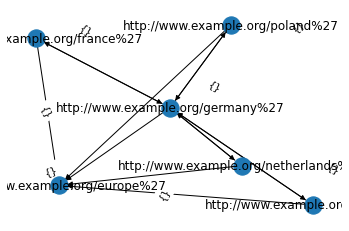

In [8]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from networkx.algorithms.approximation import clique

g = rdflib.Graph()

# Definieer de relaties
has_border_with = rdflib.URIRef('http://www.example.org/has_border_with%27')
located_in = rdflib.URIRef('http://www.example.org/located_in%27')

# Definieer de landen
germany = rdflib.URIRef('http://www.example.org/germany%27')
france = rdflib.URIRef('http://www.example.org/france%27')
netherlands = rdflib.URIRef('http://www.example.org/netherlands%27')
poland = rdflib.URIRef('http://www.example.org/poland%27')
austria = rdflib.URIRef('http://www.example.org/austria%27')

# Definieer het continent
europa = rdflib.URIRef('http://www.example.org/europe%27')

# Maak de graaf
g.add((france,located_in,europa))
g.add((germany,located_in,europa))
g.add((netherlands,located_in,europa))
g.add((poland,located_in,europa))
g.add((austria,located_in,europa))

g.add((germany,has_border_with,france))
g.add((france,has_border_with,germany))
g.add((germany,has_border_with,netherlands))
g.add((netherlands,has_border_with,germany))
g.add((germany,has_border_with,poland))
g.add((poland,has_border_with,germany))
g.add((germany,has_border_with,austria))
g.add((austria,has_border_with,germany))


G = rdflib_to_networkx_multidigraph(g)

pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos)
nx.draw(G, with_labels=True)
print('closeness centrality:', nx.closeness_centrality(G))
print('max clique:', clique.max_clique(G))
print('average shortest path length:', nx.average_shortest_path_length(G))